In [1]:
# libraries
import pandas as pd
import numpy as np
import tensorflow as tf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Corr.
Number of features selected: 23
train R2 : 0.745
test R2 : 0.546
Lasso


KeyboardInterrupt: 

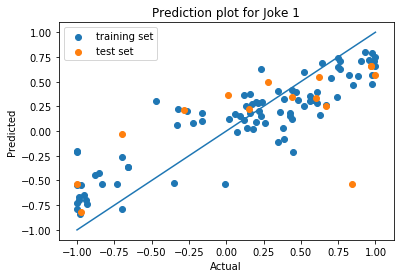

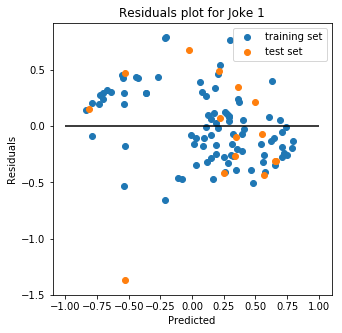

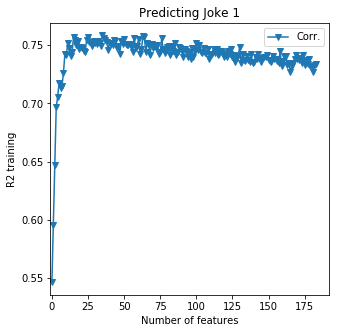

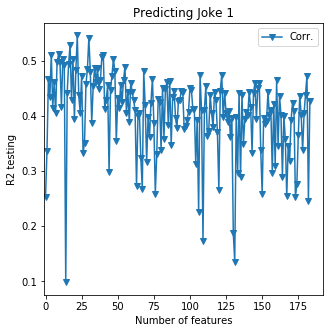

In [17]:
# original
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 25 21:16:14 2018

@author: T
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 

#X = data.drop(['joke1'], axis = 1)
#y = data['joke1']
#first few variables of the first few principal components
#princomp = pd.DataFrame(pca.components_.T).iloc[:65,:1]
#top 10 features of first principal component
#pcafeatures = []
#for item in princomp.sort_values(by=[0], ascending=False).index.tolist()[:10]:
#    pcafeatures.append(X.columns[item])

def PCR(regr, labeling):
    pca = PCA()
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=100)
    
    X_reduced_train = pca.fit_transform(train_X)
    n = len(X_reduced_train)
    kf_10 = model_selection.KFold(n, n_folds=10, shuffle=True, random_state=1)
    r2 = []
    score = -1*cross_val_score(regr, np.ones((n,1)), train_y.ravel(), cv=kf_10, scoring='r2').mean()
    r2.append(score)
    
    for i in np.arange(1, 20):
        score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], train_y.ravel(), cv=kf_10, scoring='r2').mean()
        r2.append(score)
    
    plt.plot(r2, '-v', label=labeling)
    plt.xlabel('Number of principal components in regression')
    plt.ylabel('R2')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    
    np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    numcomp = r2.index(max(r2))
    print("Number of principal components: {}" .format(numcomp))
    
    X_reduced_test = pca.transform(test_X)[:,:numcomp+1]
    X_reduced_train = pca.transform(train_X)[:,:numcomp+1]
    regr.fit(X_reduced_train[:,:numcomp+1], train_y)
    pred_train = regr.predict(X_reduced_train)
    pred_test = regr.predict(X_reduced_test)
    print("{} train R2 : {:.3f}" .format(labeling, r2_score(train_y, pred_train)))
    print("{} test R2 : {:.3f}" .format(labeling, r2_score(test_y, pred_test)))
#    print("MSE: {:.3f}".format(mean_squared_error(test_y, pred)))
#    print('train R2 : {:.3f}'.format(regr.score(train_y, pred_train)))

def r2(pred, actual):
    RSS = 0
    TSS = 0
    for i in range(0, len(pred)):
        TSS = TSS + ((actual[i] - np.mean(actual))**2)
        RSS = RSS + ((actual[i] - pred[i])**2)
    R2 = 1-RSS/TSS
    return R2

def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

def evaluation(regr, labeling, ranked_features):
    totaltrainr2 = []
    totaltestr2 = []
    totaltrainmse = []
    totaltestmse = []
    min_test_mse = 0
    max_test_r2 = 0
    num_features_to_use = 0
    
    #iterating over the ranked features from most to least important
    for i in range(1,len(ranked_features)):
        trainr2 = []
        testr2 = []
        mse_train = []
        mse_test = []
        test_features = ranked_features[:i]
        n = len(X[test_features])

        from sklearn.model_selection import KFold 
        kf = KFold(n_splits=7, shuffle=True) 
        
        for train_index, test_index in kf.split(X[test_features]):
              train_X, test_X = X[test_features].iloc[train_index], X[test_features].iloc[test_index] 
              train_y, test_y = y.iloc[train_index], y.iloc[test_index]     
             
              regr.fit(train_X, train_y)
              pred_train = regr.predict(train_X)
              pred_test = regr.predict(test_X)
              
              trainr2.append(r2(pred_train,list(train_y)))
              testr2.append(r2(pred_test, list(test_y)))              
              
              mse_train.append(mse(train_y, list(pred_train)))              
              mse_test.append(mse(test_y, list(pred_test)))   
          
        totaltrainr2.append(np.mean(trainr2))
        totaltestr2.append(np.mean(testr2))
        totaltrainmse.append(np.mean(mse_train))
        totaltestmse.append(np.mean(mse_test))
        
#        if min_test_mse == 0:
#            min_test_mse = np.mean(mse_test)
        if max_test_r2 == 0:
            max_test_r2 = np.mean(testr2)
#        if np.mean(mse_test) < min_test_mse:
        if np.mean(testr2) > max_test_r2:
#            min_test_mse = np.mean(mse_test)
#            min_train_mse = np.mean(mse_train)
            max_test_r2 = np.mean(testr2)
            max_train_r2 = np.mean(trainr2)
            num_of_features_to_use = i
            used_train_y = train_y
            used_pred_train = pred_train
            used_test_y = test_y
            used_pred_test = pred_test
            
    print("Number of features selected: {}".format(num_of_features_to_use))
    print("train R2 : {:.3f}" .format(max_train_r2))
    print("test R2 : {:.3f}" .format(max_test_r2))    
#    print("train MSE: {:.3f}".format(min_train_mse))
#    print("test MSE: {:.3f}".format(min_test_mse))
    
    #pred v. actual & residual plots        
    plt.scatter(used_train_y, used_pred_train, label='training set')
    plt.scatter(used_test_y, used_pred_test, label='test set')
    plt.plot( [-1,1],[-1,1] )
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Prediction plot for Joke 1')        
    plt.legend()
    plt.figure(figsize=(5,5))    

    plt.scatter(used_pred_train, used_pred_train-used_train_y, label='training set')
    plt.scatter(used_pred_test, used_pred_test-used_test_y, label='test set')
    plt.hlines(y=0, xmin=-1, xmax=1)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals plot for Joke 1')
    plt.legend()
    plt.figure(figsize=(5,5))    

    #Training plots
#    plt.plot(totaltrainmse, '-v', label=labeling)
#    plt.xlabel('Number of features')
#    plt.ylabel('MSE training')
#    plt.title('Predicting Joke 1')
#    plt.xlim(xmin=-1);
#    plt.legend()
#    plt.figure(figsize=(5,5))

    plt.plot(totaltrainr2, '-v', label=labeling)
    plt.xlabel('Number of features')
    plt.ylabel('R2 training')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    plt.figure(figsize=(5,5))

    #Testing plots
#    plt.plot(totaltestmse, '-v', label=labeling)
#    plt.xlabel('Number of features')
#    plt.ylabel('MSE testing')
#    plt.title('Predicting Joke 1')
#    plt.xlim(xmin=-1);
#    plt.legend()
#    plt.figure(figsize=(5,5))    
    
    plt.plot(totaltestr2, '-v', label=labeling)
    plt.xlabel('Number of features')
    plt.ylabel('R2 testing')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    plt.figure(figsize=(5,5))    
    
    
def rank_to_dict(ranks, names, order=1):
    from sklearn.preprocessing import MinMaxScaler
    
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

def list_features(key, features, names):
    featurelist = []
    for i in features.sort_values(key, ascending = False).index.values:
        featurelist.append(names[i])
    return(featurelist)         

def feature_selection():
    from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
    from sklearn.feature_selection import RFE, f_regression
     
    np.random.seed(0)
    names = X.columns
    ranks = {}

    lr = LinearRegression(fit_intercept=True,normalize=False)         
    lr.fit(X, y)
    ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
     
    ridge = Ridge(alpha=7)
    ridge.fit(X, y)
    ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
     
    lasso = Lasso(alpha=.05)
    lasso.fit(X, y)
    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
      
    ##stop the search when 5 features are left (they will get equal scores)
    regr = RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)
    rfe = RFE(regr, n_features_to_select=5)
    rfe.fit(X,y)
    ranks["RFE"] = rank_to_dict(list(map(float,rfe.ranking_)), names, order=-1)
     
    rf = RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)
    rf.fit(X,y)
    ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
     
    f, pval  = f_regression(X, y, center=True)
    ranks["Corr."] = rank_to_dict(f, names)
     
    r = {}
    for name in names:
        r[name] = round(np.mean([ranks[method][name] 
                                 for method in ranks.keys()]), 2)
    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")
    
    #extract features in order of most to least important
    matrix = []
    matrix.append(methods)
    for name in names:
        matrix.append(list(map(str,[ranks[method][name] for method in methods])))
    npmat = np.array(matrix)
    ranked_features = pd.DataFrame(data=npmat[1:,0:], columns=npmat[0,0:])

    #just testing random forest for now
    models = [RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)] #SVR(kernel="sigmoid", C=0.5, coef0=-0.5)] #MLPRegressor(hidden_layer_sizes = (3),max_iter=500)]    
    for model in models: 
        print(model)
        for feature_selection_method in methods:
            print(feature_selection_method)
#        feature_selection_method = "RFE" #Just testing RFE for now    
            evaluation(model, feature_selection_method, list_features(feature_selection_method,ranked_features,names))

    
def LOF(): #Removing outliers
    from sklearn.neighbors import LocalOutlierFactor
    
    clf = LocalOutlierFactor(n_neighbors=20)
    y_pred = clf.fit_predict(data)
    outliers = [i for i, x in enumerate(y_pred.tolist()) if x == -1]
    print(outliers)
    print(data)
    data.drop(outliers, inplace=True)
    data.reset_index(drop=True, inplace=True)
    data.to_csv("dataoutlier.csv")
    

data = pd.read_csv('data-LOFapplied.csv')
#LOF()
jokes = list(data.columns)[list(data.columns).index('joke1'):len(data.columns)]
X = data.drop(jokes[75], axis=1)
y = data[jokes[75]]
feature_selection()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 25 21:16:14 2018

@author: T
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 

#X = data.drop(['joke1'], axis = 1)
#y = data['joke1']
#first few variables of the first few principal components
#princomp = pd.DataFrame(pca.components_.T).iloc[:65,:1]
#top 10 features of first principal component
#pcafeatures = []
#for item in princomp.sort_values(by=[0], ascending=False).index.tolist()[:10]:
#    pcafeatures.append(X.columns[item])

def PCR(regr, labeling):
    pca = PCA()
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=100)
    
    X_reduced_train = pca.fit_transform(train_X)
    n = len(X_reduced_train)
    kf_10 = model_selection.KFold(n, n_folds=10, shuffle=True, random_state=1)
    r2 = []
    score = -1*cross_val_score(regr, np.ones((n,1)), train_y.ravel(), cv=kf_10, scoring='r2').mean()
    r2.append(score)
    
    for i in np.arange(1, 20):
        score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], train_y.ravel(), cv=kf_10, scoring='r2').mean()
        r2.append(score)
    
    plt.plot(r2, '-v', label=labeling)
    plt.xlabel('Number of principal components in regression')
    plt.ylabel('R2')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    
    np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    numcomp = r2.index(max(r2))
    print("Number of principal components: {}" .format(numcomp))
    
    X_reduced_test = pca.transform(test_X)[:,:numcomp+1]
    X_reduced_train = pca.transform(train_X)[:,:numcomp+1]
    regr.fit(X_reduced_train[:,:numcomp+1], train_y)
    pred_train = regr.predict(X_reduced_train)
    pred_test = regr.predict(X_reduced_test)
    print("{} train R2 : {:.3f}" .format(labeling, r2_score(train_y, pred_train)))
    print("{} test R2 : {:.3f}" .format(labeling, r2_score(test_y, pred_test)))
#    print("MSE: {:.3f}".format(mean_squared_error(test_y, pred)))
#    print('train R2 : {:.3f}'.format(regr.score(train_y, pred_train)))

def r2(pred, actual):
    RSS = 0
    TSS = 0
    for i in range(0, len(pred)):
        TSS = TSS + ((actual[i] - np.mean(actual))**2)
        RSS = RSS + ((actual[i] - pred[i])**2)
    R2 = 1-RSS/TSS
    return R2

def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

def evaluation(regr, labeling, ranked_features):
    totaltrainr2 = []
    totaltestr2 = []
    totaltrainmse = []
    totaltestmse = []
    min_test_mse = 0
    max_test_r2 = 0
    num_features_to_use = 0
    
    #iterating over the ranked features from most to least important
    for i in range(1,len(ranked_features)):
        trainr2 = []
        testr2 = []
        mse_train = []
        mse_test = []
        test_features = ranked_features[:i]
        n = len(X[test_features])

        from sklearn.model_selection import KFold 
        kf = KFold(n_splits=7, shuffle=True) 
        
        for train_index, test_index in kf.split(X[test_features]):
              train_X, test_X = X[test_features].iloc[train_index], X[test_features].iloc[test_index] 
              train_y, test_y = y.iloc[train_index], y.iloc[test_index]     
             
              regr.fit(train_X, train_y)
              pred_train = regr.predict(train_X)
              pred_test = regr.predict(test_X)
              
              trainr2.append(r2(pred_train,list(train_y)))
              testr2.append(r2(pred_test, list(test_y)))              
              
              mse_train.append(mse(train_y, list(pred_train)))              
              mse_test.append(mse(test_y, list(pred_test)))   
          
        totaltrainr2.append(np.mean(trainr2))
        totaltestr2.append(np.mean(testr2))
        totaltrainmse.append(np.mean(mse_train))
        totaltestmse.append(np.mean(mse_test))
        
#        if min_test_mse == 0:
#            min_test_mse = np.mean(mse_test)
        if max_test_r2 == 0:
            max_test_r2 = np.mean(testr2)
#        if np.mean(mse_test) < min_test_mse:
        if np.mean(testr2) > max_test_r2:
#            min_test_mse = np.mean(mse_test)
#            min_train_mse = np.mean(mse_train)
            max_test_r2 = np.mean(testr2)
            max_train_r2 = np.mean(trainr2)
            num_of_features_to_use = i
            used_train_y = train_y
            used_pred_train = pred_train
            used_test_y = test_y
            used_pred_test = pred_test
            
    print("Number of features selected: {}".format(num_of_features_to_use))
    print("train R2 : {:.3f}" .format(max_train_r2))
    print("test R2 : {:.3f}" .format(max_test_r2))    
#    print("train MSE: {:.3f}".format(min_train_mse))
#    print("test MSE: {:.3f}".format(min_test_mse))
    
    #pred v. actual & residual plots        
    plt.scatter(used_train_y, used_pred_train, label='training set')
    plt.scatter(used_test_y, used_pred_test, label='test set')
    plt.plot( [-1,1],[-1,1] )
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Prediction plot for Joke 1')        
    plt.legend()
    plt.figure(figsize=(5,5))    

    plt.scatter(used_pred_train, used_pred_train-used_train_y, label='training set')
    plt.scatter(used_pred_test, used_pred_test-used_test_y, label='test set')
    plt.hlines(y=0, xmin=-1, xmax=1)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residuals plot for Joke 1')
    plt.legend()
    plt.figure(figsize=(5,5))    

    #Training plots
#    plt.plot(totaltrainmse, '-v', label=labeling)
#    plt.xlabel('Number of features')
#    plt.ylabel('MSE training')
#    plt.title('Predicting Joke 1')
#    plt.xlim(xmin=-1);
#    plt.legend()
#    plt.figure(figsize=(5,5))

    plt.plot(totaltrainr2, '-v', label=labeling)
    plt.xlabel('Number of features')
    plt.ylabel('R2 training')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    plt.figure(figsize=(5,5))

    #Testing plots
#    plt.plot(totaltestmse, '-v', label=labeling)
#    plt.xlabel('Number of features')
#    plt.ylabel('MSE testing')
#    plt.title('Predicting Joke 1')
#    plt.xlim(xmin=-1);
#    plt.legend()
#    plt.figure(figsize=(5,5))    
    
    plt.plot(totaltestr2, '-v', label=labeling)
    plt.xlabel('Number of features')
    plt.ylabel('R2 testing')
    plt.title('Predicting Joke 1')
    plt.xlim(xmin=-1);
    plt.legend()
    plt.figure(figsize=(5,5))    
    
    
def rank_to_dict(ranks, names, order=1):
    from sklearn.preprocessing import MinMaxScaler
    
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

def list_features(key, features, names):
    featurelist = []
    for i in features.sort_values(key, ascending = False).index.values:
        featurelist.append(names[i])
    return(featurelist)         

def feature_selection():
    from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
    from sklearn.feature_selection import RFE, f_regression
     
    np.random.seed(0)
    names = X.columns
    ranks = {}

    lr = LinearRegression(fit_intercept=True,normalize=False)         
    lr.fit(X, y)
    ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)

     
    ridge = Ridge(alpha=7)
    ridge.fit(X, y)
    ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
    lasso = Lasso(alpha=.05)
    lasso.fit(X, y)
    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
    print lasso.coef_
    ##stop the search when 5 features are left (they will get equal scores)
    regr = RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)
    rfe = RFE(regr, n_features_to_select=5)
    rfe.fit(X,y)
    ranks["RFE"] = rank_to_dict(list(map(float,rfe.ranking_)), names, order=-1)
     
    rf = RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)
    rf.fit(X,y)
    ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
     
    f, pval  = f_regression(X, y, center=True)
    ranks["Corr."] = rank_to_dict(f, names)
     
    r = {}
    for name in names:
        r[name] = round(np.mean([ranks[method][name] 
                                 for method in ranks.keys()]), 2)
    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")
    
    #extract features in order of most to least important
    matrix = []
    matrix.append(methods)
    for name in names:
        matrix.append(list(map(str,[ranks[method][name] for method in methods])))
    npmat = np.array(matrix)
    ranked_features = pd.DataFrame(data=npmat[1:,0:], columns=npmat[0,0:])

    #just testing random forest for now
    models = [RandomForestRegressor(n_estimators=50, max_features="sqrt", min_samples_leaf=4, max_depth=3, bootstrap=True)] #SVR(kernel="sigmoid", C=0.5, coef0=-0.5)] #MLPRegressor(hidden_layer_sizes = (3),max_iter=500)]    
    for model in models: 
        print(model)
        for feature_selection_method in methods:
            print(feature_selection_method)
#        feature_selection_method = "RFE" #Just testing RFE for now    
            evaluation(model, feature_selection_method, list_features(feature_selection_method,ranked_features,names))

    
def LOF(): #Removing outliers
    from sklearn.neighbors import LocalOutlierFactor
    
    clf = LocalOutlierFactor(n_neighbors=20)
    y_pred = clf.fit_predict(data)
    outliers = [i for i, x in enumerate(y_pred.tolist()) if x == -1]
    print(outliers)
    print(data)
    data.drop(outliers, inplace=True)
    data.reset_index(drop=True, inplace=True)
    data.to_csv("dataoutlier.csv")
    

data = pd.read_csv('data-LOFapplied.csv')
#LOF()
jokes = list(data.columns)[list(data.columns).index('joke1'):len(data.columns)]
X = data.drop(jokes[75], axis=1)
y = data[jokes[75]]
feature_selection()

In [2]:
data = pd.read_csv('data-LOFapplied.csv')
#LOF()
jokes = list(data.columns)[list(data.columns).index('joke1'):len(data.columns)]
X = data.drop(jokes[75], axis=1)
y = data[jokes[75]]

In [21]:
def linear_regression(X, y):
    # Gradient Descent
    rows = X.shape[0]
    n_dim = X.shape[1]

    tf_X = tf.placeholder(tf.float32, [n_dim])
    tf_y = tf.placeholder(tf.float32)

    # set random weight
    W = tf.Variable([np.random.randn() for i in range(n_dim)], name="weight")
    b = tf.Variable(np.random.randn(), name="bias")
    learning_rate = 0.01
    epochs = 100

    # Construct a linear model
    mult = tf.reduce_sum(tf.multiply(tf_X, W))
    pred = tf.add(mult, b)
    cost = tf.reduce_sum(tf.pow(pred-tf_y, 2))/(2.0*rows)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    # start training
    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(epochs):
            for i in range(rows):
                _x = X.iloc[i]
                _y = y[i]

                sess.run(optimizer, feed_dict={tf_X: _x, tf_y: _y})
        
        print ("Optimization Finished")
        return sess.run(W)

names = X.columns
ranks = {}
ranks["Linear reg"] = rank_to_dict(np.abs(linear_regression(X, y)), names)
#     print "W=", sess.run(W), "b=", sess.run(b)

Optimization Finished


In [6]:
import numpy as np
from copy import deepcopy

class Lasso():
    def __init__(self, alpha=1.0, max_iter=1000, fit_intercept=True):
        self.alpha = alpha
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None

    def _soft_thresholding_operator(self, x, lambda_):
        if x > 0 and lambda_ < abs(x):
            return x - lambda_
        elif x < 0 and lambda_ < abs(x):
            return x + lambda_
        else:
            return 0

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.column_stack((np.ones(len(X)),X))

        beta = np.zeros(X.shape[1])
        if self.fit_intercept:
            beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:]))/(X.shape[0])

        for iteration in range(self.max_iter):
            start = 1 if self.fit_intercept else 0
            for j in range(start, len(beta)):
                tmp_beta = deepcopy(beta)
                tmp_beta[j] = 0.0
                r_j = y - np.dot(X, tmp_beta)
                arg1 = np.dot(X[:, j], r_j)
                arg2 = self.alpha*X.shape[0]

                beta[j] = self._soft_thresholding_operator(arg1, arg2)/(X[:, j]**2).sum()

            if self.fit_intercept:
                beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:]))/(X.shape[0])

        if self.fit_intercept:
            self.intercept_ = beta[0]
            self.coef_ = beta[1:]
        else:
            self.coef_ = beta

        return self

    def predict(self, X):
        y = np.dot(X, self.coef_)
        if self.fit_intercept:
            y += self.intercept_*np.ones(len(y))
        return y

model = Lasso(alpha=0.05, max_iter=1000)
model.fit(X, y)
print model.coef_

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00